In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import requests
style.use('ggplot')
plt.rcParams["figure.figsize"] = (20,10)

# Data Import

In [2]:
df = pd.read_csv(r'C:/Users/tanay/Downloads/DABUR.NS.csv')

In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-27,500.399994,505.850006,491.649994,493.200012,489.962463,1640739.0
1,2020-01-28,493.250000,499.200012,486.750000,488.399994,485.193970,1372031.0
2,2020-01-29,490.899994,495.500000,488.700012,491.600006,488.372955,830287.0
3,2020-01-30,492.000000,496.200012,472.149994,478.750000,475.607330,7747030.0
4,2020-01-31,483.950012,503.450012,480.049988,495.750000,492.495728,7462427.0
...,...,...,...,...,...,...,...
245,2021-01-19,539.049988,547.450012,539.000000,541.400024,541.400024,2174161.0
246,2021-01-20,544.000000,544.849976,536.599976,537.650024,537.650024,1606896.0
247,2021-01-21,540.000000,546.000000,535.400024,537.049988,537.049988,2903743.0
248,2021-01-22,537.000000,540.500000,531.299988,532.950012,532.950012,2153095.0


In [4]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [5]:
import yfinance as yf

In [10]:
a1 = yf.Ticker("RELIANCE.NS")
df = a1.history(period="8d" , interval = '5m')


In [11]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2021-01-14 09:15:00+05:30,1942.800049,1948.000000,1940.800049,1948.000000,0,0,0
2021-01-14 09:20:00+05:30,1946.000000,1953.000000,1946.000000,1952.800049,299879,0,0
2021-01-14 09:25:00+05:30,1952.900024,1956.050049,1949.250000,1951.000000,196161,0,0
2021-01-14 09:30:00+05:30,1950.800049,1952.699951,1946.599976,1950.050049,177447,0,0
2021-01-14 09:35:00+05:30,1950.050049,1950.050049,1942.500000,1949.900024,322876,0,0
...,...,...,...,...,...,...,...
2021-01-25 15:05:00+05:30,1947.800049,1948.400024,1945.000000,1945.050049,255247,0,0
2021-01-25 15:10:00+05:30,1945.000000,1946.349976,1941.949951,1944.800049,679103,0,0
2021-01-25 15:15:00+05:30,1944.949951,1945.500000,1940.000000,1940.949951,760237,0,0


In [15]:
df['High'].rolling(5).max()

Datetime
2021-01-14 09:15:00+05:30            NaN
2021-01-14 09:20:00+05:30            NaN
2021-01-14 09:25:00+05:30            NaN
2021-01-14 09:30:00+05:30            NaN
2021-01-14 09:35:00+05:30    1956.050049
                                ...     
2021-01-25 15:05:00+05:30    1950.000000
2021-01-25 15:10:00+05:30    1950.000000
2021-01-25 15:15:00+05:30    1950.000000
2021-01-25 15:20:00+05:30    1949.000000
2021-01-25 15:25:00+05:30    1948.400024
Name: High, Length: 600, dtype: float64

In [ ]:
# other alternatives nsepy / quandl / nsepy

In [4]:
import alpha_vantage
import pandas as pd

df = pd.DataFrame()
API_URL = "https://www.alphavantage.co/query"

symbols= ["RELIANCE.BO"]
for symbol in symbols:
    data = {
        "function": "GLOBAL_QUOTE",
        "symbol": symbol,
        "apikey": "XMVABQPGZTZRJNON",
        }

    response = requests.get(API_URL, params=data)

    print(response.json())

{'Global Quote': {'01. symbol': 'RELIANCE.BO', '02. open': '1931.2000', '03. high': '1968.2500', '04. low': '1929.0500', '05. price': '1951.5000', '06. volume': '702232', '07. latest trading day': '2021-02-08', '08. previous close': '1924.0000', '09. change': '27.5000', '10. change percent': '1.4293%'}}


# Bollinger Band Implementation

In [16]:
# calculate Simple Moving Average with 20 days window
a1 = yf.Ticker("RELIANCE.NS")
df = a1.history(period="120d" , interval = '1d')

sma = df.rolling(window=20).mean()

# calculate the standar deviation
rstd = df.rolling(window=20).std()


In [17]:
sma

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-08-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2021-01-19,1962.082501,1981.495007,1940.167511,1962.195001,12006805.55,0.0,0.0
2021-01-20,1965.702502,1986.450006,1945.815015,1968.095001,12071058.70,0.0,0.0
2021-01-21,1973.302502,1994.877509,1953.532513,1975.872498,12523013.15,0.0,0.0


In [18]:

upper_band = sma + 2 * rstd
lower_band = sma - 2 * rstd

upper_band

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-08-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2021-01-19,2024.930464,2037.403793,2012.265852,2030.447177,2.005588e+07,0.0,0.0
2021-01-20,2033.521448,2050.848362,2018.548327,2046.685446,2.017341e+07,0.0,0.0
2021-01-21,2056.580646,2080.580908,2045.290121,2072.968806,2.090755e+07,0.0,0.0


In [19]:

df['BB_Upper'] = upper_band['Close']
df['BB_Lower'] = lower_band['Close']

In [20]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,BB_Upper,BB_Lower
Date,,,,,,,,,
2020-08-06,2157.000000,2167.699951,2107.800049,2134.100098,22762545,0,0,NaN,NaN
2020-08-07,2129.800049,2157.800049,2120.199951,2146.449951,15222303,0,0,NaN,NaN
2020-08-10,2159.100098,2165.000000,2108.100098,2119.850098,12441573,0,0,NaN,NaN
2020-08-11,2134.800049,2160.000000,2100.350098,2133.800049,21611256,0,0,NaN,NaN
2020-08-12,2121.000000,2145.000000,2106.800049,2127.600098,13967116,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2021-01-19,1994.650024,2031.000000,1994.650024,2016.400024,14771048,0,0,2030.447177,1893.942826
2021-01-20,2021.400024,2058.000000,2001.400024,2054.699951,14271669,0,0,2046.685446,1889.504556
2021-01-21,2082.000000,2120.000000,2075.000000,2099.399902,18038987,0,0,2072.968806,1878.776189


<function matplotlib.pyplot.show(*args, **kw)>

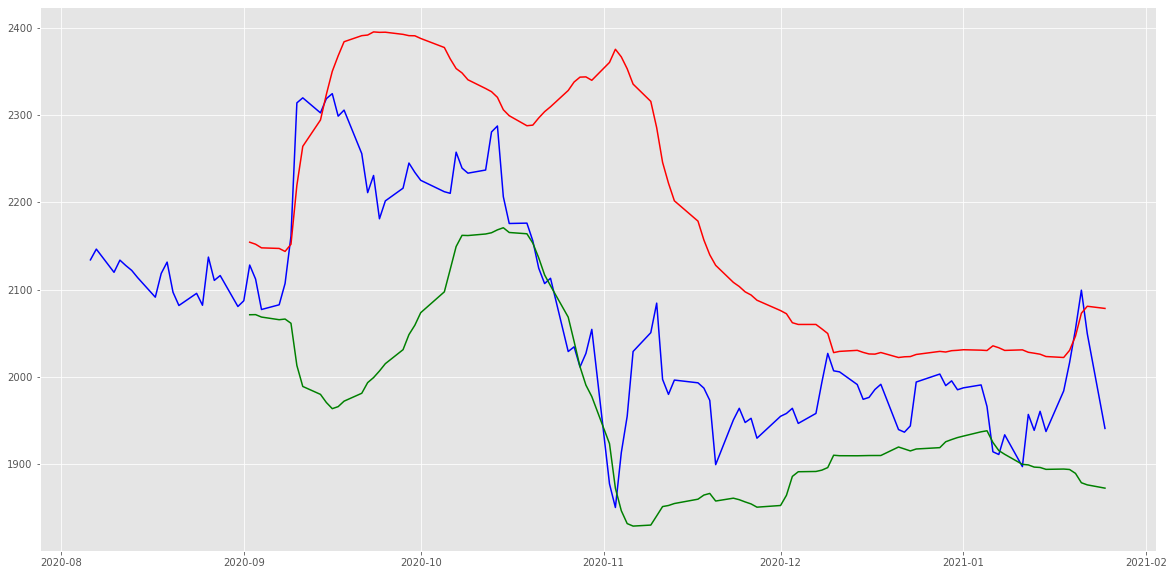

In [21]:
plt.plot(df['Close'], color = 'blue')
plt.plot(df['BB_Upper'], color = 'red')
plt.plot(df['BB_Lower'] , color = 'green')
plt.show